In [ ]:
# 파라미터 변경해서 다시 확인하기
# epochs :30 ->100 변경
# Dropout : 0.25 
# batch size : 16

In [ ]:
# 1. 라이브러리 임포트

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.preprocessing import image
from tensorflow.image import resize

In [84]:
# 2. 모델 생성 ( Sequential ~ compile까지만 실행 )

In [66]:
# model=Sequential()

# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(244, 244, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(12, activation='softmax'))

In [2]:
model=Sequential()

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(12, activation='softmax'))

# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# cnn.fit(x = training_set, epochs = 10)

In [3]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [4]:
model_dir = "./model6"
model_path = model_dir + "/BILLS.hdf5"

In [88]:
# 3. ImageDataGenerator를 통한 트레이닝,테스트 데이터 만들기
# - 디렉토리 지정을 통한 데이터 증식
# - fit으로 훈련 시키기

In [5]:
train_gen = ImageDataGenerator(rescale = 1./255,
                              #shear_range=0.2,
                              #zoom_range=0.2,
                              rotation_range = 90) 
                              # horizontal_flip=True

In [6]:
train_flow_gen = train_gen.flow_from_directory(directory="C:/Users/user/Desktop/Pics/train",
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=32,
                                              shuffle=True)

Found 6000 images belonging to 12 classes.


In [7]:
test_gen = ImageDataGenerator(rescale=1./255)

In [9]:
test_flow_gen = test_gen.flow_from_directory(directory="C:/Users/user/Desktop/Pics/test",
                                            target_size=(224,224),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=False)

Found 600 images belonging to 12 classes.


In [10]:
validation_flow_gen = test_gen.flow_from_directory(directory="C:/Users/user/Desktop/Pics/validation",
                                            target_size=(224,224),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=False)

Found 1800 images belonging to 12 classes.


In [11]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10)
checkpoint = ModelCheckpoint(filepath = model_path,
                             monitor = 'val_loss',
                            verbose = 1,
                            save_best_only = True)                            

In [12]:
train_hist = model.fit(train_flow_gen, 
                       epochs = 100,
                       batch_size = 32,
                       validation_data = validation_flow_gen, 
                       verbose = 1,
                       callbacks = [early_stopping, checkpoint])

# train, validation 데이터로 fit
# steps_per_epochs 한 번 epoch를 돌 때, 데이터를 몇 번 볼 것인가. 트레이닝 데이터 수 / 배치사이즈
# validation_steops : 한 번 epoch를 돌고난 후, validation set을 통해 validation accuracy를 측정할 때, validation set을 몇 번 볼 것인지. validation data 수 / 배치사이즈


Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 2.3748 - accuracy: 0.1653
Epoch 1: val_loss improved from inf to 2.33334, saving model to ./model6\BILLS.hdf5
188/188 [==============================] - 792s 4s/step - loss: 2.3748 - accuracy: 0.1653 - val_loss: 2.3333 - val_accuracy: 0.1172
Epoch 2/100


C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


188/188 [==============================] - ETA: 0s - loss: 1.8934 - accuracy: 0.3458
Epoch 2: val_loss did not improve from 2.33334
188/188 [==============================] - 789s 4s/step - loss: 1.8934 - accuracy: 0.3458 - val_loss: 11.9107 - val_accuracy: 0.1294
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.5413 - accuracy: 0.8275
Epoch 3: val_loss did not improve from 2.33334
188/188 [==============================] - 794s 4s/step - loss: 0.5413 - accuracy: 0.8275 - val_loss: 17.5356 - val_accuracy: 0.1822
Epoch 4/100
188/188 [==============================] - ETA: 0s - loss: 0.1536 - accuracy: 0.9498
Epoch 4: val_loss did not improve from 2.33334
188/188 [==============================] - 784s 4s/step - loss: 0.1536 - accuracy: 0.9498 - val_loss: 14.3585 - val_accuracy: 0.1517
Epoch 5/100
188/188 [==============================] - ETA: 0s - loss: 0.1052 - accuracy: 0.9685
Epoch 5: val_loss did not improve from 2.33334
188/188 [============================

In [13]:
# 모델 평가
model.evaluate(test_flow_gen)


19/19 [==============================] - 39s 2s/step - loss: 1.7206 - accuracy: 0.7067


[1.7206305265426636, 0.7066666483879089]

In [14]:
# 클래스 레이블 확인하기
class_indices = train_flow_gen.class_indices
print(class_indices)

{'10000krw': 0, '1000jpy': 1, '1000krw': 2, '1000twd': 3, '1000vnd': 4, '10euro': 5, '20thb': 6, '2usd': 7, '5000jpy': 8, '5000krw': 9, '500vnd': 10, '50euro': 11}


In [15]:
#인덱스에 해당하는 클래스 레이블 찾기
def get_key(val):
    for key, value in class_indices.items():
        if val == value :
            return key

In [29]:
# 모델 불러와서 새로운 이미지 분류해보기

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# 새로운 이미지 불러오기 및 전처리
img_path = 'C:/Users/user/Desktop/test/5000krw_test_3.jpg'  # 예시 이미지 경로
img = image.load_img(img_path, target_size=(224, 224))  # 이미지 크기 조정
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
img_array = img_array / 255.0  # 이미지 정규화 (예시로 0~1 범위로 조정)

# 모델 불러오기
loaded_model = tf.keras.models.load_model("C:/Users/user/Downloads/model6/BILLS.hdf5")

# 새로운 이미지에 모델 적용하여 예측
predictions = loaded_model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_class_label = get_key(predicted_class_index)
predicted_class_label

1/1 [==============================] - 0s 94ms/step


'1000twd'

In [ ]:
# 검증

In [25]:
print(train_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


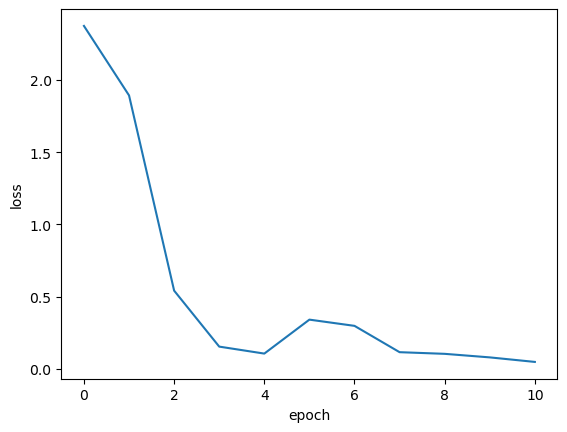

In [26]:
import matplotlib.pyplot as plt
plt.plot(train_hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

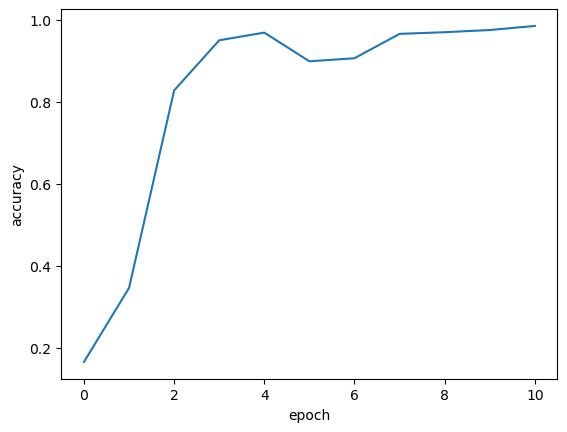

In [27]:

plt.plot(train_hist.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

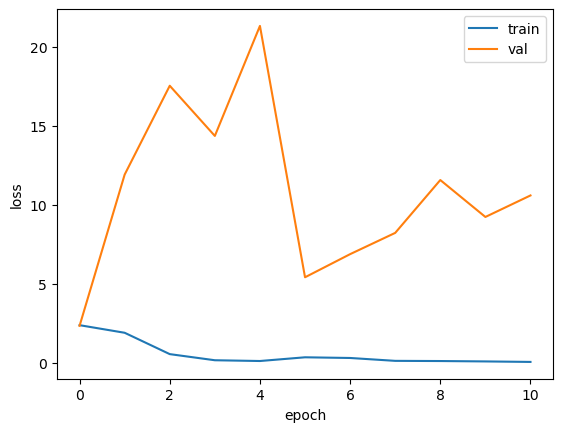

In [28]:
plt.plot(train_hist.history['loss'])
plt.plot(train_hist.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
## 이미지 증식 ##

In [28]:
import Augmentor

In [128]:

notes = ['10000krw', '1000jpy', '1000krw', '1000twd', '1000vnd', '10euro', '20thb', '2usd', '5000jpy', '5000krw', '500vnd', '50euro']

for note in notes:
    input_path = f"C:/Users/user/Desktop/N_test/{note}"          # 원본 이미지 폴더 경로
    output_path = f"C:/Users/user/Desktop/Pics/test/{note}"      # 증강 이미지를 저장할 폴더 경로
    pipeline = Augmentor.Pipeline(input_path, output_directory=output_path)    # 파이프라인 생성
    pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)   # 증강할 이미지 조건 
    #pipeline.zoom_random(probability=0.5, percentage_area=0.8)
    #pipeline.flip_top_bottom(probability=0.5)

    pipeline.sample(50)  # 증강 이미지 수 입력
    print("이미지 증강이 완료되었습니다.")

Initialised with 2 image(s) found.
Output directory set to C:/Users/user/Desktop/Pics/test/10000krw.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1558x3500 at 0x249261043D0>: 100%|█| 50/50 [00:03<00:

이미지 증강이 완료되었습니다.


In [ ]:
## 증식한 이미지를 폴더로 나눠서 넣기 ##

In [27]:
import os
import random
import shutil

In [59]:
# 증강 이미지 폴더 경로
original_dataset_dir = "C:/Users/user/Desktop/Aug"

In [60]:
# 각각의 데이터셋 폴더 생성
base_dir = "C:/Users/user/Desktop/Aug_split"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [61]:
# 클래스별 폴더 생성
class_folders = os.listdir(original_dataset_dir)

In [62]:
for class_folder in class_folders:
    os.mkdir(os.path.join(train_dir, class_folder))
    os.mkdir(os.path.join(validation_dir, class_folder))
    os.mkdir(os.path.join(test_dir, class_folder))

In [63]:
# 이미지 파일 리스트 생성
for class_folder in class_folders:
    class_images = os.listdir(os.path.join(original_dataset_dir, class_folder))
    random.shuffle(class_images)

    train_size = int(0.6 * len(class_images))
    val_size = int(0.2 * len(class_images))

    train_images = class_images[:train_size]
    val_images = class_images[train_size:train_size + val_size]
    test_images = class_images[train_size + val_size:]

    def copy_images(images, source, destination):
        for img in images:
            src_path = os.path.join(source, img)
            dest_path = os.path.join(destination, img)
            shutil.copy(src_path, dest_path)

    copy_images(train_images, os.path.join(original_dataset_dir, class_folder), os.path.join(train_dir, class_folder))
    copy_images(val_images, os.path.join(original_dataset_dir, class_folder), os.path.join(validation_dir, class_folder))
    copy_images(test_images, os.path.join(original_dataset_dir, class_folder), os.path.join(test_dir, class_folder))